In [1]:
import pickle, json, collections, itertools
from zipfile import ZipFile
from datetime import datetime
from tqdm import tqdm_notebook as tqdm
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline

# Read data

In [2]:
df = pd.read_csv('android_bids_us.csv')
df

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click
0,87b0108c-6e9f-4783-8b80-8dd5aa3529a8,1536444331894,com.OppanaGames.CarSim,TX,AT&T Wireless,NaN,NaN,7.0,720,1280,chartboost,0
1,9284441f-a6ea-4698-9017-86436b92d416,1536444363932,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,NaN,NaN,7.0,1280,720,chartboost,0
2,7e4779c2-f757-4324-8c2a-138b558b5a54,1536444386908,com.kuttigames.tenkyurollball,LA,AT&T Wireless,NaN,NaN,7.1.1,720,1280,chartboost,0
3,b64ea208-38ca-42ac-895e-0842d7352cc3,1536444405023,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,NaN,NaN,6.0.1,720,1280,chartboost,0
4,fd0c07cb-31f6-408c-9315-1cb652e76abc,1536444443458,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,NaN,NaN,7.1.1,1024,768,chartboost,0
5,234541bb-9183-493e-8ad7-0d86fe619b15,1536444487429,com.kick.trucks.manual.shift.driving,FL,T-Mobile USA,NaN,NaN,7.0,720,1280,chartboost,0
6,31d4270d-32e8-441a-95e4-6a27ca21a356,1536444496213,com.slots.realvegas2,FL,Spectrum,NaN,NaN,7.1.1,720,1280,chartboost,0
7,3259e135-743b-48d9-b2e6-71707a2a9013,1536444316772,bitcoin.blockchain.game,GA,Sprint PCS,NaN,NaN,8.0.0,1920,1080,chartboost,0
8,9d897068-12a8-4a77-b12f-3150ffa9a6dd,1536444329288,com.feelingtouch.zf3d,ME,Spectrum,NaN,NaN,8.0.0,918,1887,chartboost,0
9,eba79a5a-a33b-4e54-af28-cad9b21d0739,1536444355834,com.ffgames.driftstar,UT,Comcast Cable,NaN,NaN,7.0,1440,2672,chartboost,0


# Time Zone manipulation

In [3]:
df.utc_time.apply(lambda t: (datetime.fromtimestamp(t//1000)).hour)

0           1
1           1
2           1
3           1
4           1
5           1
6           1
7           1
8           1
9           1
10          1
11          1
12          1
13          1
14          1
15          1
16          1
17          1
18          1
19          1
20          1
21          5
22          5
23          5
24          5
25          5
26          5
27          5
28          5
29          5
           ..
3148798     4
3148799     4
3148800     4
3148801     4
3148802     4
3148803     4
3148804     4
3148805     4
3148806     4
3148807     4
3148808     4
3148809     4
3148810     4
3148811     4
3148812     4
3148813     4
3148814     4
3148815     4
3148816     4
3148817    22
3148818    22
3148819     4
3148820     4
3148821     4
3148822     4
3148823     4
3148824     4
3148825     4
3148826     4
3148827     4
Name: utc_time, Length: 3148828, dtype: int64

# State to time zone difference

In [4]:
us_tz = pd.read_csv('us_tz.csv')
us_tz

,state,abbr,tz,utc_diff
0,Alaska,AK,AKST,-9
1,Alabama,AL,CST,-6
2,Arkansas,AR,CST,-6
3,Arizona,AZ,MST,-7
4,California,CA,PST,-8
5,Colorado,CO,MST,-7
6,Connecticut,CT,EST,-5
7,"Washington, D.C.",DC,EST,-5
8,Delaware,DE,EST,-5
9,Florida,FL,EST,-5


# Exercise #1

1. Enrich the dataframe with `user_timezone`, `user_hour`, `user_month`, `user_day_of_week` columns
1. Plot a heatmap of `user_day_of_week`x`user_hour`
1. (Bonus) repeat this analysis with `user_holiday` vs `user_workday`

In [5]:
df_ny = df[df.user_state=='NY'][["utc_time", "click"]]
df_ny["user_hour"] = df_ny.utc_time.apply(lambda t: (datetime.fromtimestamp(t//1000-5*3600)).hour)
df_ny["user_day_of_week"] = df_ny.utc_time.apply(lambda t: (datetime.fromtimestamp(t//1000-5*3600)).weekday())
df_ny = df_ny.drop("utc_time", axis=1)
df_ny

,click,user_hour,user_day_of_week
67,1,4,1
88,0,20,5
97,0,20,5
155,0,20,5
164,0,20,5
220,0,10,4
221,0,10,4
237,0,10,4
269,0,0,6
316,0,4,1


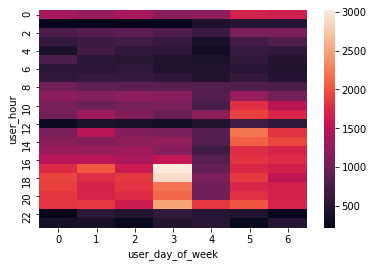

In [6]:
df_heatmap = df_ny.pivot_table(values="click",
                               index="user_hour",
                               columns="user_day_of_week",
                               aggfunc=len)
seaborn.heatmap(df_heatmap)

# Benchmark Model
In this part, we would implement out own naive classifier based on only one feature.

In [37]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import classification_report, accuracy_score
from random import random

class RandomGuessClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, target_col, feature_col):
        self.feature = feature_col
        self.target = target_col
    def fit(self, X, y=None):
        assert y is None
        self.prob = X.groupby(self.feature).sum()[self.target] / X[self.feature].value_counts()
        self.prob = dict(zip(self.prob.index, self.prob.values))
        return self
    def predict(self, X):
        return X[self.feature].apply(lambda x: random()<self.prob.get(x,0))

y = df_ny.click
y_hat = RandomGuessClassifier("click", "user_day_of_week").fit(df_ny).predict(df_ny)
print (classification_report(y, y_hat))
accuracy_score(y, y_hat)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93    167995
           1       0.07      0.07      0.07     12551

   micro avg       0.87      0.87      0.87    180546
   macro avg       0.50      0.50      0.50    180546
weighted avg       0.87      0.87      0.87    180546



0.8694404750036002

# Exercise #2
1. Does it make sense to run `RandomGuessClassifier` on `user_state` ?
2. Run `RandomGuessClassifier` for `user_day_of_week`x`user_hour`